In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/content/club_participation (1).csv"
df = pd.read_csv(file_path)

# Make a copy
df_encoded = df.copy()

# Label encode the target column: 'club_participation'
le = LabelEncoder()
df_encoded['club_participation'] = le.fit_transform(df_encoded['club_participation'])  # yes=1, no=0

# Split features and target
X = df_encoded.drop('club_participation', axis=1)
y = df_encoded['club_participation']

# Output check
print("✅ Data processed.")
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print(X.head())
print(y.head())


✅ Data processed.
Features shape: (100, 2)
Target shape: (100,)
   interest_level  free_hours_per_week
0               4                   17
1               6                   12
2               8                   19
3               6                   19
4               9                   17
0    0
1    0
2    0
3    1
4    0
Name: club_participation, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate performance
print("✅ Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model Evaluation
Accuracy: 0.55

Confusion Matrix:
 [[ 0  9]
 [ 0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      1.00      0.71        11

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
# Example student data as a DataFrame (with correct column names)
new_student = pd.DataFrame([[7, 10]], columns=X.columns)

# Predict using the trained model
prediction = model.predict(new_student)
probability = model.predict_proba(new_student)

# Output result
result = "Yes" if prediction[0] == 1 else "No"
print(f"🎓 Will the student join a club? → {result}")
print(f"📊 Prediction Probability: Yes = {probability[0][1]:.2f}, No = {probability[0][0]:.2f}")


🎓 Will the student join a club? → Yes
📊 Prediction Probability: Yes = 0.59, No = 0.41


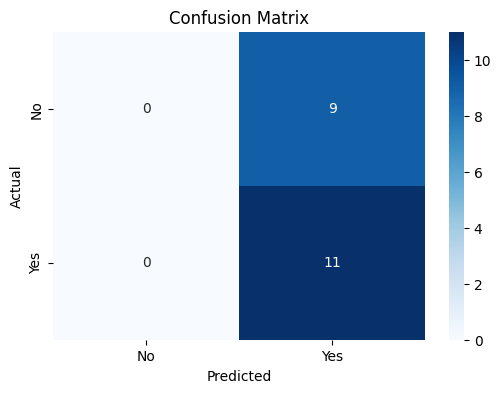

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

